<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

#### B. Binary classification on [Histopathologic Cancer Dataset](https://www.kaggle.com/c/histopathologic-cancer-detection/data)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
# from google.colab.patches import cv2_imshow
import pandas as pd 
import os
from skimage.transform import resize
from skimage.io import imread

In [4]:
df = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

In [5]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [6]:
image = plt.imread('../input/histopathologic-cancer-detection/train/'+df['id'][0]+'.tif')

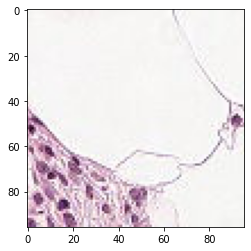

In [7]:
plt.imshow(image)

In [8]:
df.shape[0]

220025

<AxesSubplot:>

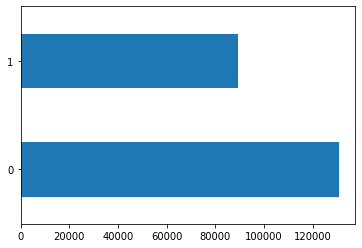

In [9]:
df['label'].value_counts().plot(kind='barh')

In [10]:
# count of each class
df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [11]:
# taking a subset of the dataset due to memory error
dfnew = df.sample(n=500)

In [12]:
dfnew['label'].value_counts()

0    292
1    208
Name: label, dtype: int64

In [13]:
dfnew.head()

,id,label
73048,cb51b3f4d0d959d5819ffe1418b9feb8b535c45b,1
202570,9c5f76cd05e1198b41dbc5c590371583904aa661,1
131768,2d6a36fa7b904d437e5ec8be0c2eb04b41db24d8,0
29351,04fb0fea3e799923aa404b0a7fc67ed9211a6752,1
211869,78d4e6dc5e11116b74b4cae8b9e8fbb87c2ac622,0


In [14]:
dfnew.reset_index(drop = True, inplace = True)

In [15]:
dfnew.head()

,id,label
0,cb51b3f4d0d959d5819ffe1418b9feb8b535c45b,1
1,9c5f76cd05e1198b41dbc5c590371583904aa661,1
2,2d6a36fa7b904d437e5ec8be0c2eb04b41db24d8,0
3,04fb0fea3e799923aa404b0a7fc67ed9211a6752,1
4,78d4e6dc5e11116b74b4cae8b9e8fbb87c2ac622,0


In [16]:
flat_data_arr = [] #input array
target_arr = [] #output array
datadir = '../input/histopathologic-cancer-detection/train/'

#path which contains all the categories of images
for i in range(dfnew.shape[0]):
    img = dfnew['id'][i] + '.tif'
    img_array = imread(os.path.join(datadir,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(dfnew['label'][i])

In [17]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
dfn = pd.DataFrame(flat_data) #dataframe
dfn['Target'] = target

In [18]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.594289,0.418651,0.547682,0.577840,0.402400,0.530838,0.553420,0.378361,0.504871,0.600152,...,0.843600,0.679004,0.782675,0.705652,0.540384,0.633293,0.623057,0.457702,0.545713,1
1,0.567867,0.371915,0.723053,0.577420,0.380568,0.734999,0.572243,0.374118,0.736792,0.421203,...,0.294588,0.112824,0.461310,0.232270,0.059261,0.409054,0.213296,0.043384,0.393374,1
2,0.924499,0.823438,0.888742,0.859758,0.751802,0.823892,0.720392,0.596965,0.686847,0.627529,...,0.818816,0.706886,0.802431,0.905722,0.819580,0.896533,0.932602,0.859460,0.927718,0
3,0.676191,0.485906,0.786720,0.668681,0.483380,0.785095,0.628878,0.455545,0.758353,0.466845,...,0.794722,0.640447,0.895137,0.776897,0.648930,0.908449,0.766707,0.649128,0.911040,1
4,0.878336,0.662141,0.774003,0.897464,0.679380,0.791638,0.927718,0.703459,0.816549,0.885252,...,0.857937,0.628078,0.759608,0.768701,0.527054,0.658595,0.712943,0.466904,0.598246,0


In [19]:
x = dfn.iloc[:,:-1] #input data 
y = dfn.iloc[:,-1] #output data

In [20]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    0
496    1
497    1
498    0
499    0
Name: Target, Length: 500, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [22]:
# non-linear svm
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(0.1) # non-linearity
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, int(1e7), 1e-6))

In [23]:
svm.train(np.asarray(x_train, np.float32), cv2.ml.ROW_SAMPLE, np.array(y_train))

True

In [24]:
np.asarray(x_train, np.float32)[0]

array([0.95143527, 0.9234918 , 0.9208439 , ..., 0.5318196 , 0.27285805,
       0.43011293], dtype=float32)

In [26]:
response = svm.predict(np.asarray(x_test, np.float32))[1]

In [28]:
sv = svm.getUncompressedSupportVectors() # the support vectors
print(sv)

[[0.95143527 0.9234918  0.9208439  ... 0.5318196  0.27285805 0.43011293]
 [0.32147607 0.18789648 0.5740141  ... 0.8647984  0.8583671  0.86415213]
 [0.77425885 0.6029945  0.6559655  ... 0.55772394 0.30962667 0.44905883]
 ...
 [0.94348234 0.9055514  0.90947294 ... 0.96483296 0.8496957  0.92794037]
 [0.8205647  0.6489475  0.71631217 ... 0.20521411 0.08011608 0.20347765]
 [0.34961882 0.13027608 0.28900236 ... 0.3159498  0.15510589 0.26200783]]


In [29]:
# performance metrics
from sklearn.metrics import accuracy_score
print("Accuracy score", accuracy_score(y_test, [x[0] for x in response]))

Accuracy score 0.7


In [30]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix\n", confusion_matrix(y_test, [x[0] for x in response]))

Confusion matrix
 [[47 17]
 [13 23]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,[x[0] for x in response]))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76        64
           1       0.57      0.64      0.61        36

    accuracy                           0.70       100
   macro avg       0.68      0.69      0.68       100
weighted avg       0.71      0.70      0.70       100



#### Observation
1. Here an accuracy of 70% is observed when we take 500 sample of images from the 0.2M samples, due to RAM constraints. We have flattened out the 2D image array to 1D and fed them as features to the SVM. The value of C which controls the margin size is relatively large, to prevent more misclassification errors. The number of iterations is reduced from 1e7 to 1e6 as it takes longer processing time with the RAM getting exhausted.
2. The classifier has relatively lower values of precision and recall for class 1 which indicates the presence of tumor cells, which could be owing to the lower support of the class than class 0.

References
1. https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01
2. https://docs.opencv.org/4.x/d0/dcc/tutorial_non_linear_svms.html